In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import re
import seaborn as sns

## Revisión de Datos

In [2]:
df = pd.read_csv("compiled_raw_y.csv")
df.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DEWP,FRSHTT,GUST,MAX,...,WEEKDAY,MONTH,Y,Y+1,Y+2,Y+3,Y+4,Y+5,Y+6,Y+7
0,48303499999,"ROI ET, TH",16.116761,103.773797,137.46,25.02.10,65.8,0,999.9,98.6,...,5,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,48303499999,"ROI ET, TH",16.116761,103.773797,137.46,27.03.10,60.5,0,999.9,89.6,...,7,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,48303499999,"ROI ET, TH",16.116761,103.773797,137.46,05.04.10,72.7,0,999.9,104.0,...,2,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,48303499999,"ROI ET, TH",16.116761,103.773797,137.46,27.04.10,75.6,0,999.9,96.8,...,3,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,48303499999,"ROI ET, TH",16.116761,103.773797,137.46,02.05.10,74.2,0,999.9,96.8,...,1,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628918 entries, 0 to 628917
Data columns (total 29 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   STATION    628918 non-null  int64  
 1   NAME       628918 non-null  object 
 2   LATITUDE   628918 non-null  float64
 3   LONGITUDE  628918 non-null  float64
 4   ELEVATION  628918 non-null  float64
 5   DATE       628918 non-null  object 
 6   DEWP       628918 non-null  float64
 7   FRSHTT     628918 non-null  int64  
 8   GUST       628918 non-null  float64
 9   MAX        628918 non-null  float64
 10  MIN        628918 non-null  float64
 11  MXSPD      628918 non-null  float64
 12  PRCP       609722 non-null  float64
 13  SLP        628918 non-null  float64
 14  SNDP       628918 non-null  float64
 15  STP        628918 non-null  float64
 16  TEMP       628918 non-null  float64
 17  VISIB      628918 non-null  float64
 18  WDSP       628918 non-null  float64
 19  WEEKDAY    628918 non-n

In [4]:
df.describe()

,STATION,LATITUDE,LONGITUDE,ELEVATION,DEWP,FRSHTT,GUST,MAX,MIN,MXSPD,...,WEEKDAY,MONTH,Y,Y+1,Y+2,Y+3,Y+4,Y+5,Y+6,Y+7
count,6.289180e+05,628918.000000,628918.000000,628918.000000,628918.000000,628918.000000,628918.000000,628918.000000,628918.000000,628918.000000,...,628918.000000,628918.000000,628918.000000,624357.000000,620653.000000,617410.000000,614472.000000,611810.000000,609328.000000,607135.000000
mean,4.843425e+10,14.454029,100.984938,107.785170,72.475404,5490.193197,981.539786,92.335210,74.073038,141.011832,...,4.001546,6.386906,0.291362,0.291924,0.292266,0.292674,0.292824,0.292865,0.292954,0.292948
std,1.008296e+08,3.623005,1.693327,149.585241,57.652209,16380.797016,132.704133,81.147914,82.273604,339.917687,...,2.000472,3.408618,0.454390,0.454648,0.454804,0.454991,0.455059,0.455078,0.455118,0.455115
min,4.830010e+10,6.516667,97.933333,-999.900000,33.800000,0.000000,9.900000,47.500000,36.100000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.837410e+10,13.483333,99.804667,13.410000,70.000000,0.000000,999.900000,88.700000,71.600000,4.100000,...,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.841810e+10,15.150000,100.606750,69.700000,74.200000,0.000000,999.900000,91.800000,74.800000,6.000000,...,4.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.847410e+10,17.150000,102.078639,181.700000,76.000000,10000.000000,999.900000,95.000000,77.000000,9.900000,...,6.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,4.894610e+10,20.250000,105.033333,460.000000,9999.900000,110110.000000,999.900000,9999.900000,9999.900000,999.900000,...,7.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Limpieza de Datos

In [5]:

df = df.drop(columns=['Y','Y+1','Y+2','Y+3','Y+4','Y+5','Y+6','Y+7'])

#FRSHTT es un dato compuesto por 5 valores primarios, si es cero, significa que había ruido en la lectura, y si no hay 5 valores, ocurrió un error de algún tipo
#la cantidad de datos ruidosos o erróneos es alta, por lo que se procede a eliminar cualquier fila que cumpla con las condiciones de error validando que len == 5
df = df[df['FRSHTT'].apply(lambda x: len(str(x)) == 5)]

#luego separamos los bits en distintas columnas
df['FOG'] = df.FRSHTT.apply(lambda x: int(str(x)[0]))
df['RAIN'] = df.FRSHTT.apply(lambda x: int(str(x)[1]))
df['SNOW'] = df.FRSHTT.apply(lambda x: int(str(x)[2]))
df['HAIL'] = df.FRSHTT.apply(lambda x: int(str(x)[3]))
df['TT'] = df.FRSHTT.apply(lambda x: int(str(x)[4]))



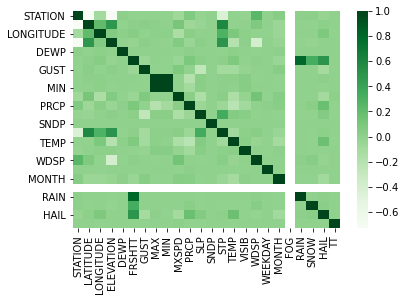

In [6]:
sns.heatmap(df.corr(), cmap="Greens")

In [7]:
#una vez separada la columna, no es necesaria tenerla
#todos los valores de fog son iguales por lo que no aporta nada al modelo
df = df.drop(columns=['FRSHTT', 'FOG'])
df.reset_index(drop=True, inplace=True)
df.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DEWP,GUST,MAX,MIN,...,STP,TEMP,VISIB,WDSP,WEEKDAY,MONTH,RAIN,SNOW,HAIL,TT
0,48303499999,"ROI ET, TH",16.116761,103.773797,137.46,08.05.11,74.8,999.9,87.8,75.2,...,999.9,81.5,5.9,5.3,1,5,0,0,0,0
1,48303499999,"ROI ET, TH",16.116761,103.773797,137.46,04.04.12,74.3,999.9,84.2,75.2,...,999.9,79.1,5.1,1.9,4,4,0,0,1,0
2,48303499999,"ROI ET, TH",16.116761,103.773797,137.46,07.04.12,69.5,999.9,80.6,71.6,...,999.9,74.9,4.1,3.4,7,4,0,0,1,0
3,48303499999,"ROI ET, TH",16.116761,103.773797,137.46,27.04.12,70.1,999.9,87.8,69.8,...,999.9,78.0,3.7,7.5,6,4,0,0,1,0
4,48303499999,"ROI ET, TH",16.116761,103.773797,137.46,06.05.12,74.2,999.9,91.4,75.2,...,999.9,81.9,6.0,7.6,1,5,0,0,1,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179532 entries, 0 to 179531
Data columns (total 24 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   STATION    179532 non-null  int64  
 1   NAME       179532 non-null  object 
 2   LATITUDE   179532 non-null  float64
 3   LONGITUDE  179532 non-null  float64
 4   ELEVATION  179532 non-null  float64
 5   DATE       179532 non-null  object 
 6   DEWP       179532 non-null  float64
 7   GUST       179532 non-null  float64
 8   MAX        179532 non-null  float64
 9   MIN        179532 non-null  float64
 10  MXSPD      179532 non-null  float64
 11  PRCP       160740 non-null  float64
 12  SLP        179532 non-null  float64
 13  SNDP       179532 non-null  float64
 14  STP        179532 non-null  float64
 15  TEMP       179532 non-null  float64
 16  VISIB      179532 non-null  float64
 17  WDSP       179532 non-null  float64
 18  WEEKDAY    179532 non-null  int64  
 19  MONTH      179532 non-n

In [9]:
df.describe()

,STATION,LATITUDE,LONGITUDE,ELEVATION,DEWP,GUST,MAX,MIN,MXSPD,PRCP,...,STP,TEMP,VISIB,WDSP,WEEKDAY,MONTH,RAIN,SNOW,HAIL,TT
count,1.795320e+05,179532.000000,179532.000000,179532.000000,179532.000000,179532.000000,179532.000000,179532.000000,179532.000000,160740.000000,...,179532.000000,179532.000000,179532.000000,179532.000000,179532.000000,179532.000000,179532.000000,179532.000000,179532.000000,179532.000000
mean,4.844085e+10,14.073599,100.879749,104.394748,75.480864,961.173280,91.080167,76.482596,146.320706,0.520002,...,554.373311,81.170778,5.512074,6.022179,4.000234,7.200427,0.000061,0.000964,0.352166,0.000117
std,1.008017e+08,3.840676,1.675686,144.958177,66.307045,190.546042,114.689933,114.780478,344.921890,0.791673,...,486.780420,3.387183,11.063337,61.852420,1.984430,2.493991,0.007827,0.031027,0.477647,0.010815
min,4.830010e+10,6.516667,97.933333,-999.900000,40.400000,9.900000,47.500000,43.700000,1.000000,0.000000,...,0.000000,46.300000,0.300000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4.837610e+10,12.500000,99.766667,12.000000,74.200000,999.900000,86.900000,73.900000,4.100000,0.050000,...,7.400000,79.400000,4.700000,0.700000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000
50%,4.842710e+10,14.800000,100.566667,51.000000,75.500000,999.900000,90.100000,75.200000,7.000000,0.230000,...,968.300000,81.300000,5.600000,1.800000,4.000000,7.000000,0.000000,0.000000,0.000000,0.000000
75%,4.850010e+10,17.116667,102.033333,178.910000,76.600000,999.900000,93.000000,77.000000,11.100000,0.670000,...,991.200000,83.200000,6.100000,3.300000,6.000000,9.000000,0.000000,0.000000,1.000000,0.000000
max,4.894610e+10,20.250000,105.033333,460.000000,9999.900000,999.900000,9999.900000,9999.900000,999.900000,18.280000,...,999.900000,98.800000,999.900000,999.900000,7.000000,12.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df.HAIL.value_counts()

0    116307
1     63225
Name: HAIL, dtype: int64

In [12]:
df.DATE.value_counts()

17.07.18    226
02.08.20    224
19.09.20    222
30.08.19    216
18.09.20    212
           ... 
15.03.15      1
08.03.14      1
04.02.14      1
08.04.10      1
03.03.14      1
Name: DATE, Length: 3713, dtype: int64

In [13]:
df= df.drop(columns=['STATION', 'DATE', 'LATITUDE', 'NAME', 'WEEKDAY', 'LONGITUDE'])
df["PRCP"].fillna("0", inplace = True)

## Modelos

## 1- REGRESIÓN LOGÍSTICA

In [16]:
from sklearn.model_selection import train_test_split
X = df.drop('HAIL', axis=1)
X_train, X_test, y_train, y_test = train_test_split(df.drop('HAIL',axis=1), 
                                                    df['HAIL'], test_size=0.3, 
                                                    random_state=101)

In [17]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train,y_train) 

LogisticRegression(solver='liblinear')

In [18]:
predictions = logmodel.predict(X_test)

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.69      0.93      0.79     35020
           1       0.64      0.22      0.32     18840

    accuracy                           0.68     53860
   macro avg       0.66      0.58      0.56     53860
weighted avg       0.67      0.68      0.63     53860



In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, predictions))

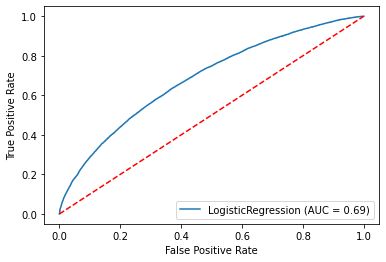

In [20]:
from sklearn import metrics
metrics.plot_roc_curve(logmodel,X_test,y_test)
ax = plt.plot([0, 1], [0, 1], color='red', linestyle='--')

In [21]:
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(logmodel, X_test, y_test, cv = 5)
print(cv_results, np.mean(cv_results))

[0.65883773 0.67870405 0.68854437 0.68492388 0.68557371] 0.6793167471221686


## 2- KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)


KNeighborsClassifier()

In [23]:
predictions = neigh.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.83      0.81     35020
           1       0.64      0.56      0.60     18840

    accuracy                           0.74     53860
   macro avg       0.71      0.70      0.70     53860
weighted avg       0.73      0.74      0.73     53860



In [24]:
cv_results = cross_val_score(logmodel, X_test, y_test, cv = 5)
print(cv_results, np.mean(cv_results))

[0.65883773 0.67870405 0.68854437 0.68492388 0.68557371] 0.6793167471221686


## SVC

In [26]:
from sklearn.svm import SVC

clf = SVC(gamma='auto')
clf.fit(X_train, y_train)

SVC(gamma='auto')

In [28]:

from sklearn.model_selection import KFold

cv = KFold(n_splits=10, random_state=1, shuffle=True)
cv_results = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(cv_results, np.mean(cv_results))

[0.76838001 0.77514322 0.77576192 0.77751253 0.77090793 0.77600064
 0.78149121 0.78069547 0.7755232  0.77822869] 0.7759644821895949


In [29]:
predictions = clf.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84     35020
           1       0.74      0.56      0.64     18840

    accuracy                           0.78     53860
   macro avg       0.77      0.73      0.74     53860
weighted avg       0.77      0.78      0.77     53860

